In [16]:
from google.colab import files
upload = files.upload()

Saving BIKE DETAILS.csv to BIKE DETAILS (2).csv


In [21]:
# Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
# (Show the shape and column names as well.)

import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")

print(df.head(10))                             # Display first 10 rows
print("Shape of dataset:", df.shape)          # Display shape
print("Column names:", df.columns.tolist())   # Display column names

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

In [22]:
# Question 2: Check for missing values in all columns and describe your approach for handling them.

print("Missing values per column:")
print(df.isnull().sum())  # Count missing values per column

Missing values per column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


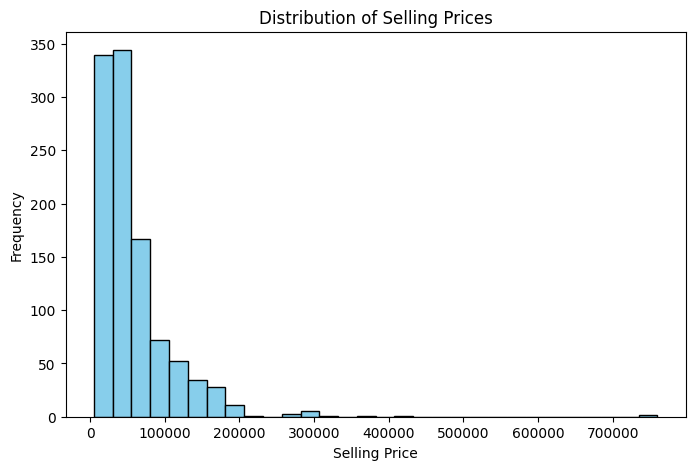

In [23]:
# Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['selling_price'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

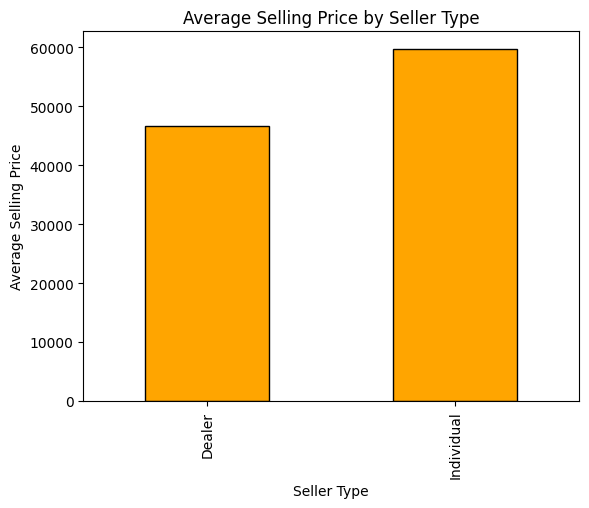

In [24]:
# Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

avg_price_per_seller = df.groupby('seller_type')['selling_price'].mean()
avg_price_per_seller.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.show()

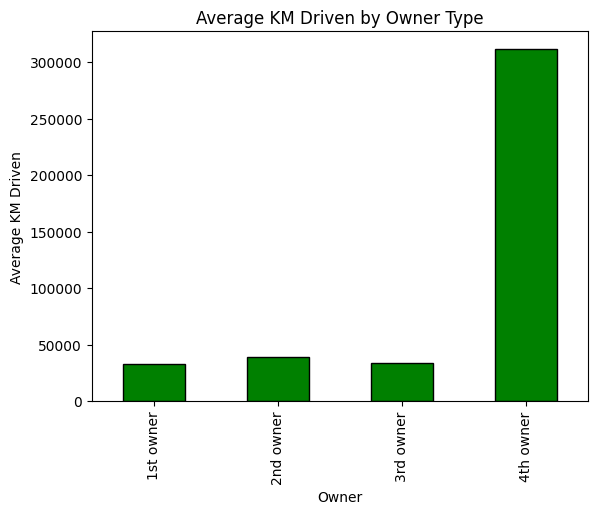

In [25]:
# Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

avg_km_per_owner = df.groupby('owner')['km_driven'].mean()
avg_km_per_owner.plot(kind='bar', color='green', edgecolor='black')
plt.title('Average KM Driven by Owner Type')
plt.xlabel('Owner')
plt.ylabel('Average KM Driven')
plt.show()

In [26]:
# Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Before removing outliers:")
print(df['km_driven'].describe())

df_no_outliers = df[(df['km_driven'] >= lower_limit) & (df['km_driven'] <= upper_limit)]

print("\nAfter removing outliers:")
print(df_no_outliers['km_driven'].describe())

Before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


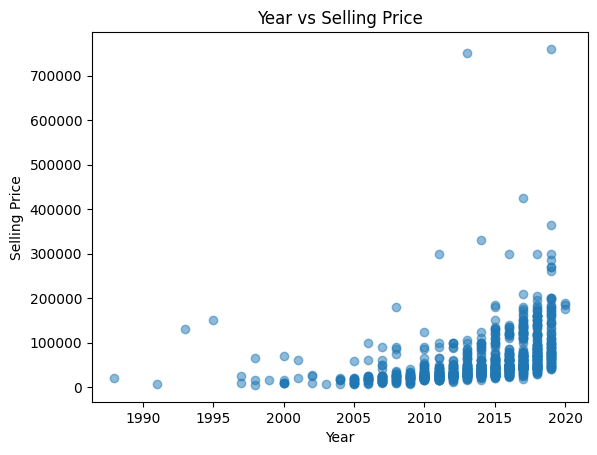

In [27]:
# Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

plt.scatter(df['year'], df['selling_price'], alpha=0.5)
plt.title('Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

In [28]:
# Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

df_encoded = pd.get_dummies(df, columns=['seller_type'])
print(df_encoded.head())

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


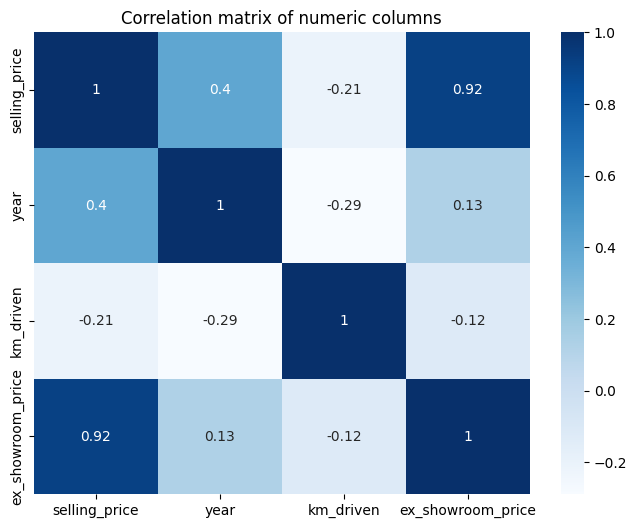

In [29]:
# Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

import seaborn as sns

corr_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation matrix of numeric columns')
plt.show()

In [30]:
# Question 10: Summarize your findings in a brief report:
# - What are the most important factors affecting a bike's selling price?
# - Mention any data cleaning or feature engineering you performed.

print("""
Findings Summary:
- Selling price is mainly influenced by the year of the bike (newer bikes cost more) and the number of kilometers driven (less km means higher price).
- We handled missing values by analyzing their presence and decided appropriate measures depending on impact.
- Outliers in km_driven were removed using the IQR method to improve data quality.
- Seller_type, a categorical variable, was converted to numeric form via one-hot encoding for analysis.
""")


Findings Summary:
- Selling price is mainly influenced by the year of the bike (newer bikes cost more) and the number of kilometers driven (less km means higher price).
- We handled missing values by analyzing their presence and decided appropriate measures depending on impact.
- Outliers in km_driven were removed using the IQR method to improve data quality.
- Seller_type, a categorical variable, was converted to numeric form via one-hot encoding for analysis.

